#  Time series plot for Precipitation, Temperature, Specific humidity, Relative humidity during Monsoon season 

# Step 1: Import Libraries

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import geopandas as gpd
from scipy.stats import linregress # for linear regression

# Step 2:  the data files

In [2]:
# Load input files as ifile
ifile1 = '/Users/HP/Desktop/AUA_workshop/pcp_India_1970-2020_monthly.nc' 
ifile2 = '/Users/HP/Desktop/AUA_workshop/T_RH_q_India_1970-2020_monthly.nc'

# Step 3: Timeseries Plot of Precipitation during monsoon (JJAS) for the period 1970-2020

<xarray.Dataset>
Dimensions:    (longitude: 117, latitude: 111, time: 612)
Coordinates:
  * longitude  (longitude) float32 68.17 68.42 68.67 68.92 ... 96.67 96.92 97.17
  * latitude   (latitude) float32 35.46 35.21 34.96 34.71 ... 8.46 8.21 7.96
  * time       (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-16 12:38:46 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


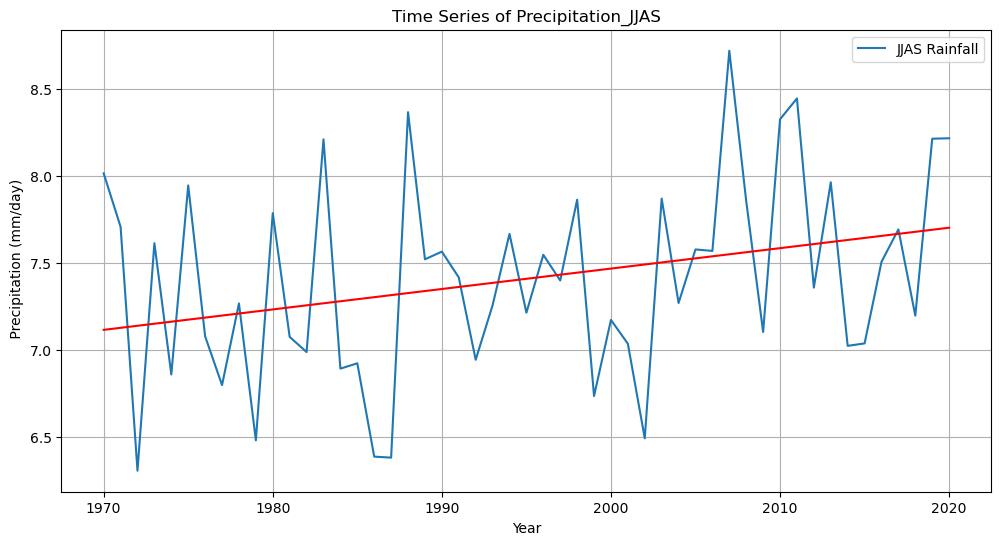

In [3]:
# Assign the data as an array named Data1
data1= xr.open_dataset(ifile1)
# See the details of the dataset 
print(data1)

# Select the variable of interest and convert the unit to mm/day  
pr = data1['tp'] *1000 #to convert the unit to mm/day
jjas_data_pr = pr.sel(time=pr['time'].dt.month.isin([6, 7, 8, 9])) # 6 is June 7 is July....

# Mean the rainfall for JJAS for each year
jjas_pr = jjas_data_pr.resample(time='1Y').mean()

# Calculate the spatial mean over latitude and longitude 
spatial_mean_jjas_pr = jjas_pr.mean(dim=['latitude', 'longitude'])

#To use only years from the date 
years = spatial_mean_jjas_pr['time.year']

#To get relation between Precipitation and Time to get the trend using linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, spatial_mean_jjas_pr)

# Plot the JJAS rainfall time series
plt.figure(figsize=(12, 6))
plt.plot(years, spatial_mean_jjas_pr, label='JJAS Rainfall')

#Plot the trend line
line = slope * years + intercept
plt.plot(years, line, color='red')

#Set the label for axes and plot title
plt.xlabel('Year')
plt.ylabel(' Precipitation (mm/day)')
plt.title('Time Series of Precipitation_JJAS')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Timeseries Plot of Temperature during monsoon (JJAS) for the period 1970-2020

<xarray.Dataset>
Dimensions:    (longitude: 117, latitude: 111, level: 2, time: 612)
Coordinates:
  * longitude  (longitude) float32 68.17 68.42 68.67 68.92 ... 96.67 96.92 97.17
  * latitude   (latitude) float32 35.46 35.21 34.96 34.71 ... 8.46 8.21 7.96
  * level      (level) int32 850 1000
  * time       (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-16 14:59:32 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


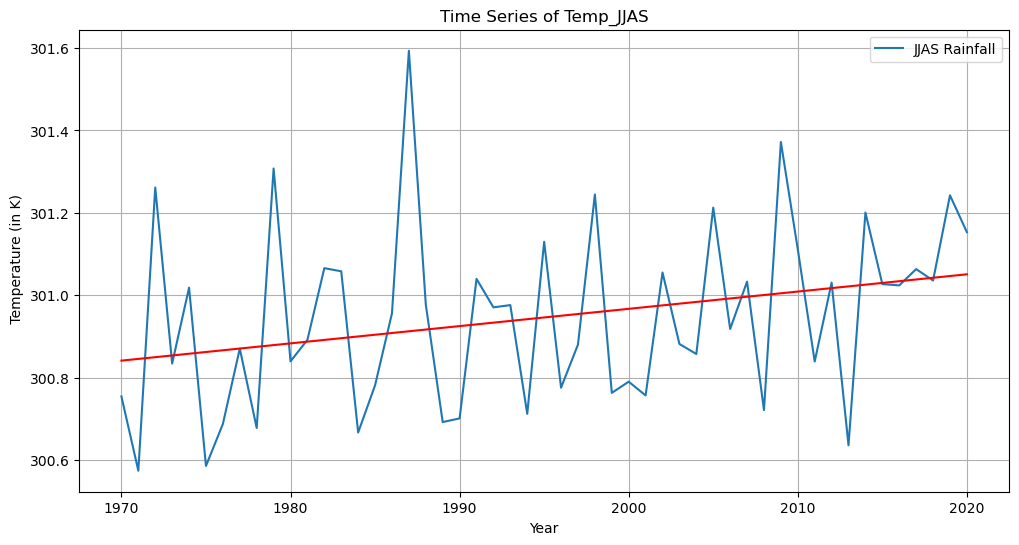

In [4]:
## Assign the data as an array named Data2
data2= xr.open_dataset(ifile2)
# See the details of the dataset
print(data2)

# Select the temperature variable
temp = data2['t']

#Selecting JJAS temperature data
jjas_data_temp =temp.sel(time=temp['time'].dt.month.isin([6, 7, 8, 9]))

# Mean the Temperature for JJAS for each year
jjas_temp = jjas_data_temp.resample(time='1Y').mean()

# Calculate the spatial mean over latitude and longitude 
spatial_mean_jjas_temp = jjas_temp.mean(dim=['latitude', 'longitude'])

#Selecting pressure level (here 1000 hPa as 1 and 850 hPa as 0)
spatial_mean_jjas_temp = spatial_mean_jjas_temp[:,1]

#To use only years from the date 
years = spatial_mean_jjas_temp['time.year']

#To get relation between Temperature and Time to get the trend using linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(years, spatial_mean_jjas_temp)

# Plot the JJAS temperature time series
plt.figure(figsize=(12, 6))
plt.plot(years, spatial_mean_jjas_temp, label='JJAS Rainfall')

#Plot the trend line
line = slope1 * years + intercept1
plt.plot(years, line, color='red')

plt.xlabel('Year')
plt.ylabel(' Temperature (in K)')
plt.title('Time Series of Temp_JJAS')
plt.legend()
plt.grid(True)
plt.show()


# Step 5: Timeseries Plot of Specific Humidity during monsoon (JJAS) for the period 1970-2020

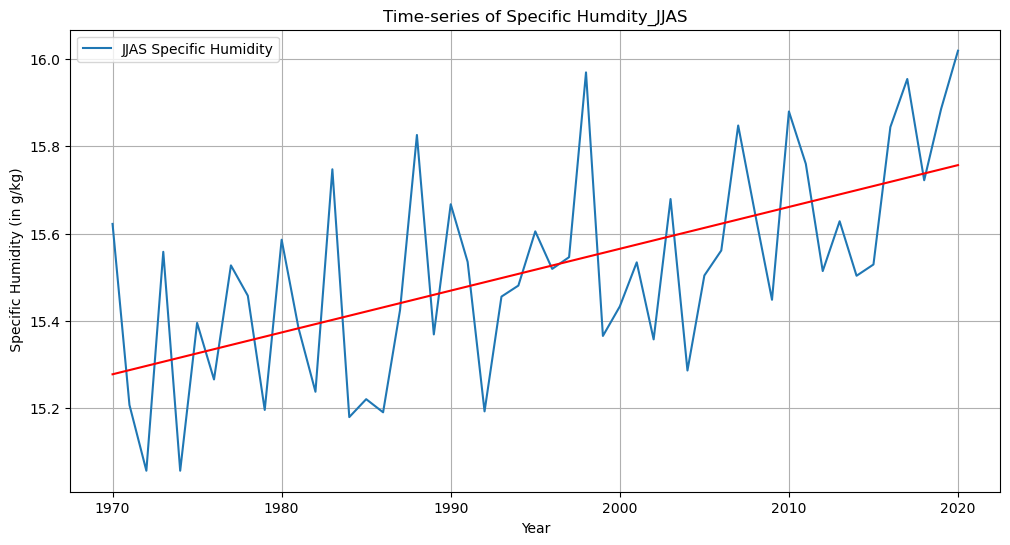

In [5]:
# Select the variable of interest here it is specific humidity 
sph = data2['q']

#Selecting JJAS Specific Humidity data
jjas_data_sph =sph.sel(time=sph['time'].dt.month.isin([6, 7, 8, 9]))

# Mean the Specific Humidity for JJAS for each year
jjas_sph = jjas_data_sph.resample(time='1Y').mean()

# Calculate the spatial mean over latitude and longitude 
spatial_mean_jjas_sph = jjas_sph.mean(dim=['latitude', 'longitude'])
spatial_mean_jjas_sph = spatial_mean_jjas_sph[:,1]*1000

years = spatial_mean_jjas_sph['time.year']

#To get relation between specific humidity and time to get the trend using linear regression
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(years, spatial_mean_jjas_sph)

# Plot the JJAS specific humidity time series
plt.figure(figsize=(12, 6))
plt.plot(years, spatial_mean_jjas_sph, label='JJAS Specific Humidity')

#Plot the trend line
line = slope2 * years + intercept2
plt.plot(years, line, color='red')

plt.xlabel('Year')
plt.ylabel(' Specific Humidity (in g/kg)')
plt.title('Time-series of Specific Humdity_JJAS')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Timeseries Plot of Ralative Humidity during monsoon (JJAS) for the period 1970-2020

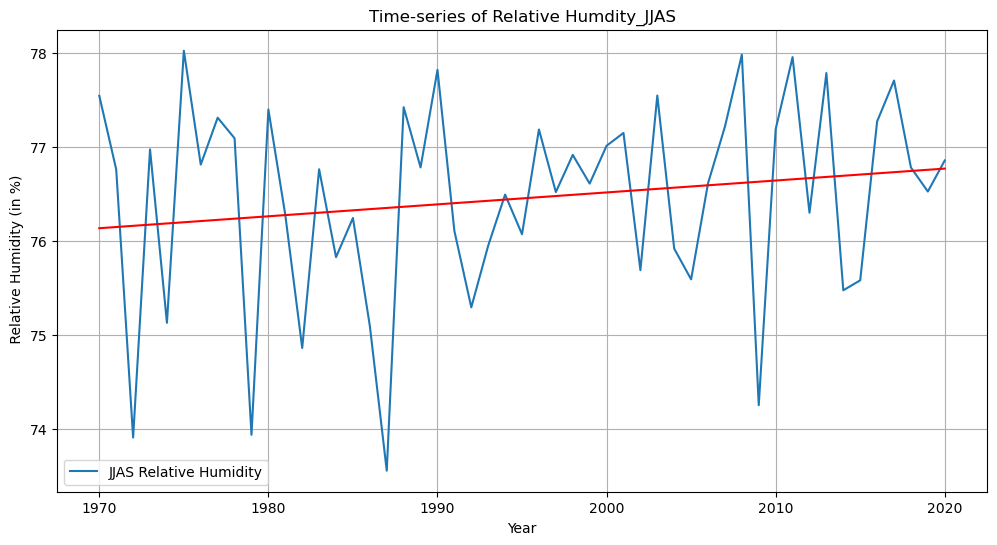

In [6]:
# Select the variable of interest here it is relative humidity 
rh = data2['r']

#Selecting JJAS relative humidity data
jjas_data_rh =rh.sel(time=rh['time'].dt.month.isin([6, 7, 8, 9]))

# Sum the rainfall for JJAS for each year
jjas_rh = jjas_data_rh.resample(time='1Y').mean()

# Calculate the spatial mean over latitude and longitude
spatial_mean_jjas_rh = jjas_rh.mean(dim=['latitude', 'longitude'])
spatial_mean_jjas_rh = spatial_mean_jjas_rh[:,1] #selecting the 1000 hPa level value

years = spatial_mean_jjas_rh['time.year'] # to see only year format not as the full date format

#To get relation between relative humidity and Time to get the trend using linear regression
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(years, spatial_mean_jjas_rh)

# Plot the JJAS relative humidity time series
plt.figure(figsize=(12, 6))
plt.plot(years, spatial_mean_jjas_rh, label='JJAS Relative Humidity')

#Plot the trend line
line = slope3 * years + intercept3
plt.plot(years, line, color='red')

plt.xlabel('Year')
plt.ylabel(' Relative Humidity (in %)')
plt.title('Time-series of Relative Humdity_JJAS')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Linear regression between two variables to find how they depend on each other (precipitation vs Temperature)

In [7]:
#To get relation between Precipitation and Temperature using linear regression
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(spatial_mean_jjas_temp, spatial_mean_jjas_pr)

# Step 7: Scatter plot between two variables to find how they depend on each other (precipitation vs Temperature)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


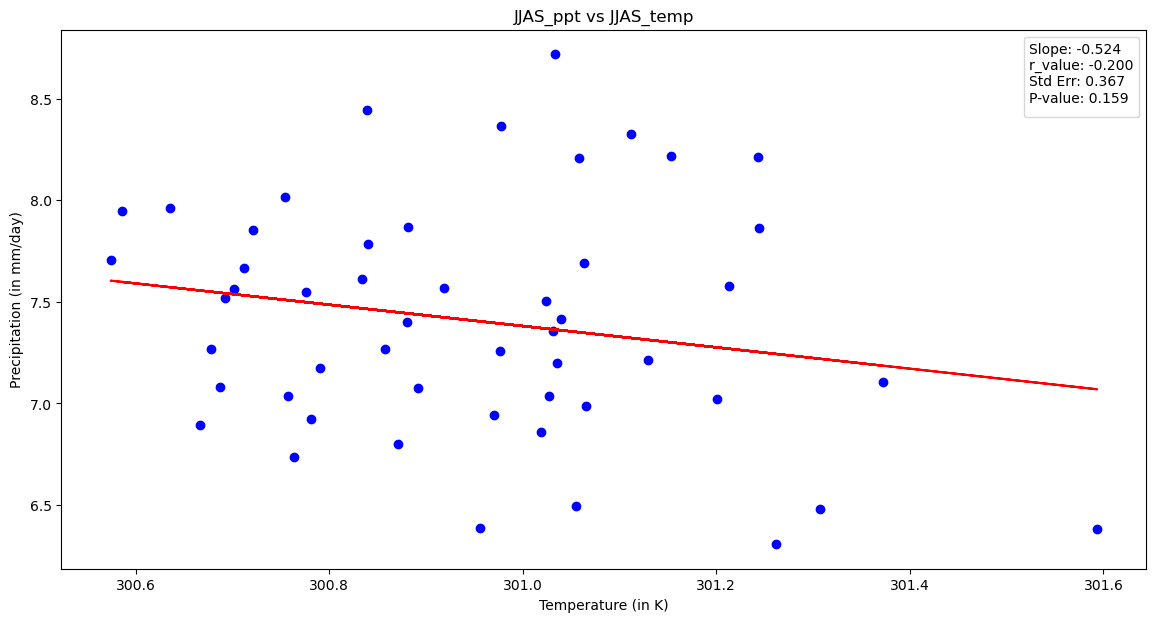

In [8]:
#plotting
plt.figure(figsize=(14, 7))
plt.scatter(spatial_mean_jjas_temp, spatial_mean_jjas_pr, color='b')

line = slope4 * spatial_mean_jjas_temp + intercept4
plt.plot(spatial_mean_jjas_temp, line, color='red')
plt.xlabel('Temperature (in K)')
plt.ylabel('Precipitation (in mm/day)')
plt.title('JJAS_ppt vs JJAS_temp')

legend_text = (f"Slope: {slope4:.3f}\n"
                   f"r_value: {r_value4:.3f}\n"
                   f"Std Err: {std_err4:.3f}\n"
                   f"P-value: {p_value4:.3f}")
plt.legend(title=legend_text, loc='best')
plt.show()

# Linear Regression between precipitation and Specific Humidity

In [9]:
#To get relation between Precipitation and specific humidity
slope5, intercept5, r_value5, p_value5, std_err5 = linregress( spatial_mean_jjas_sph, spatial_mean_jjas_pr)

# Scatter plot between Precipitation and Specific Humidity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


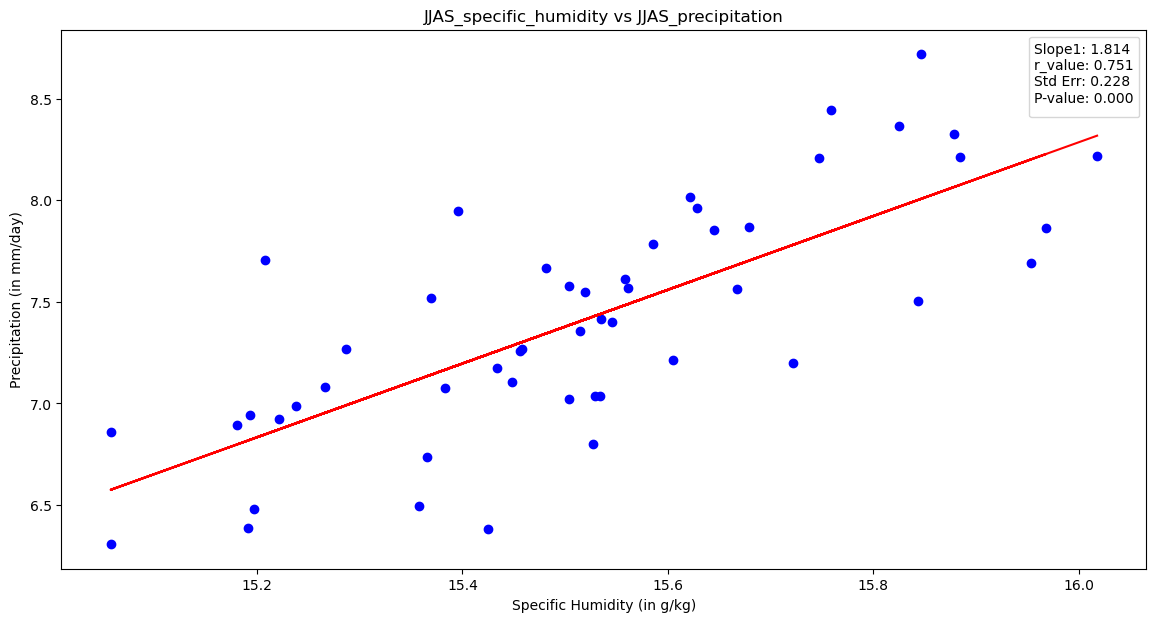

In [10]:
#plotting
plt.figure(figsize=(14, 7))
plt.scatter(spatial_mean_jjas_sph, spatial_mean_jjas_pr, color='b')

line = slope5 * spatial_mean_jjas_sph + intercept5 #regression line y=mx+c
plt.plot(spatial_mean_jjas_sph, line, color='red')
plt.xlabel('Specific Humidity (in g/kg)')
plt.ylabel('Precipitation (in mm/day)')
plt.title('JJAS_specific_humidity vs JJAS_precipitation')

legend_text = (f"Slope5: {slope1:.3f}\n"
                   f"r_value5: {r_value1:.3f}\n"
                   f"Std Err5: {std_err1:.3f}\n"
                   f"P-value5: {p_value1:.3f}")
plt.legend(title=legend_text, loc='best')
plt.show()

# Spatial plots for trends for Precipitation (JJAS) during 1970-2020

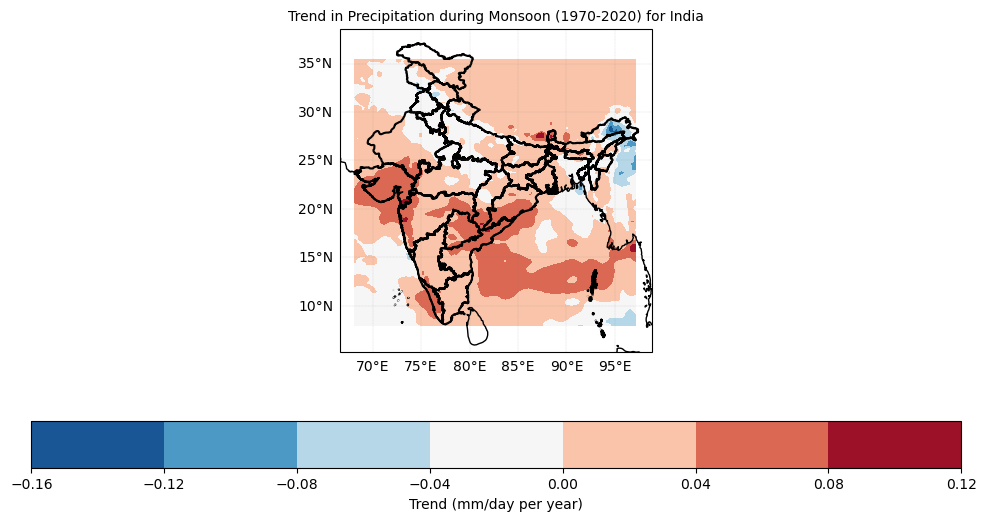

In [11]:
#Assign the latitude and longitude as two variables lat and lon respectively

lat = data1['latitude'] #since it is precipitation we are extracting the latitude from data1 for other variable it should be data2
lon = data1['longitude']

country= 'India' # Write Your Own Country Name
shapefile_path = '/Users/HP/Desktop/AUA_workshop/India_State_Boundary.shp' #give the path of the shape file for your own country
# Load the shapefile using geopandas
shapefile = gpd.read_file(shapefile_path)

#Create an 2D array named trend 
trend = np.empty((len(lat), len(lon))) #2D arrary as [(lat,lon)....] format if you want to see then can print trend after the for loop

# Calculate the trend at each grid point
for i in range(len(lat)):
    for j in range(len(lon)):
        y = jjas_pr[:, i, j]
        slope,intercept, r_value, p_value, std_err = linregress(years, y)
        trend[i, j] = slope
#Print(trend)

# Convert the trend array to an xarray.DataArray
trend_da = xr.DataArray(trend, coords=[lat, lon], dims=['latitude', 'longitude'])

# Plotting (This part is very similar to the plotting of climatology spatial plot )
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Create a meshgrid for the contour plot
lon_grid, lat_grid = np.meshgrid(trend_da['longitude'], trend_da['latitude'])

# Plot the trend data
contour = ax.contourf(lon_grid, lat_grid, trend_da, transform=ccrs.PlateCarree(), cmap='RdBu_r')
plt.colorbar(contour, ax=ax, orientation='horizontal', label='Trend (mm/day per year)')

# Overlay the shapefile boundaries
shapefile.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)

# Title and labels
plt.title(f'Trend in Precipitation during Monsoon (1970-2020) for {country}', fontsize=10)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.show()

#save Each plot using the command for saving the plot.

# Home work: 
# 1) Plot the time series for specific humidity and relative humidity for the same period (1970-2020) and the same season (Months getting heighest rainfall for your country). 
# 2) Do the Scatter plot between precipitation and specific humidity to check their dependency on each other and try to make some points on that.
# 3) Try to make the spatial plot for Trend in precipitation (of the season e.g. for India JJAS) for 1970-2020 step by step following the above-mentioned code to see with time where the precipitation is decreasing and where it is increasing for your country. 